In [1]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
from PIL import Image
from scipy import stats
import warnings, os, gc, psutil, random, sklearn
import seaborn as sns
from functools import reduce
import matplotlib.pylab as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from itertools import cycle, islice

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

c:\Users\kaush\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
tracks = pd.read_csv('PlayerTrackData.csv',
                        dtype={'time':'float64',
                                'x':'float16',
                                'y':'float16',
                                'dir': 'float16',
                                'dis': 'float16',
                                'o':'float16',
                                's':'float16'})

plays = pd.read_csv('PlayList.csv')
injury = pd.read_csv('InjuryRecord.csv')

# Create injury detailed by merging on play information
injury_detailed = injury.merge(plays, how='left')
injury_detailed = injury_detailed.merge(plays[['PlayerKey','RosterPosition']].drop_duplicates() \
                                            .rename(columns={'RosterPosition':'RosterPosition_notplay'}))
injury_detailed['RosterPosition_notplay'] = injury_detailed['RosterPosition_notplay'] \
    .replace({'Safety':'Defensive Back',
              'Cornerback' : 'Defensive Back'})

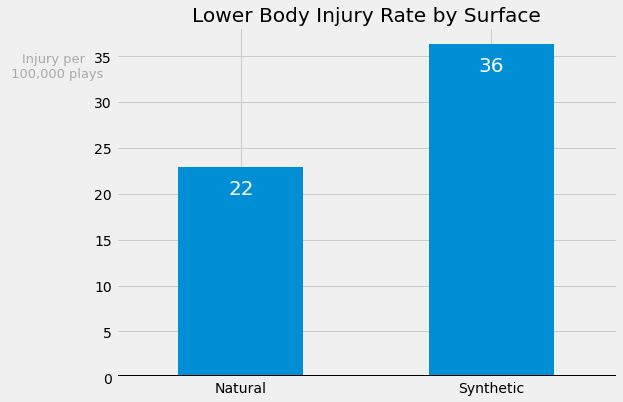

In [8]:

plt.style.use('fivethirtyeight')
# Find Injury Rate by Surface
injury_playkeys = injury['PlayKey'].unique()
plays['counter'] = 1 # Column used when grouping to count
plays['isInjuryPlay'] = False
plays.loc[plays['PlayKey'].isin(injury_playkeys), 'isInjuryPlay'] = True

# Plot Results
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
(plays.groupby('FieldType')[['isInjuryPlay']].mean() * 100000).plot(kind='bar', ax=ax)
ax.get_legend().remove()
ax.set_xlabel('')
ax.set_title('Lower Body Injury Rate by Surface')
ax.set_ylabel('Injury per \n 100,000 plays', rotation=0, fontsize=13, color='darkgrey')
ax.yaxis.set_label_coords(-0.12,0.85)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + 0.20,
                 p.get_height() - 3),
                 fontsize=20,
                color='white')
ax.axhline(0, color='k')
plt.xticks(rotation=0)
plt.show()